## Importing the Libraries

This imports pandas, numpy, matplotlib.pyplot, and seaborn so that they can be used to manipulate and analyze the data from the csv file.

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

`wine` is created here by using pandas to read the csv file and pull all the data into a single place.

In [261]:
wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 430 Machine Learning/Project1_MEH/wine.csv")

## Exploring the Dataset

`wine.head()` allows the user to see the first 5 rows of the dataset. `wine.info()` allows the user to see the total number of entries, the datatypes of each column, how many entries are null / not null, and each column in the dataset. `wine.describe()` shows the mean, standard deviation, and distributions of each column in the dataset. `sns.pairplot(wine)` plots histograms of each column of the dataset to visualize all the data in each column. `value_counts()` is called to determine if `wine[quality]` is evenly distributed. Since it is, y does not need to be stratified later.

In [262]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [263]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [264]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


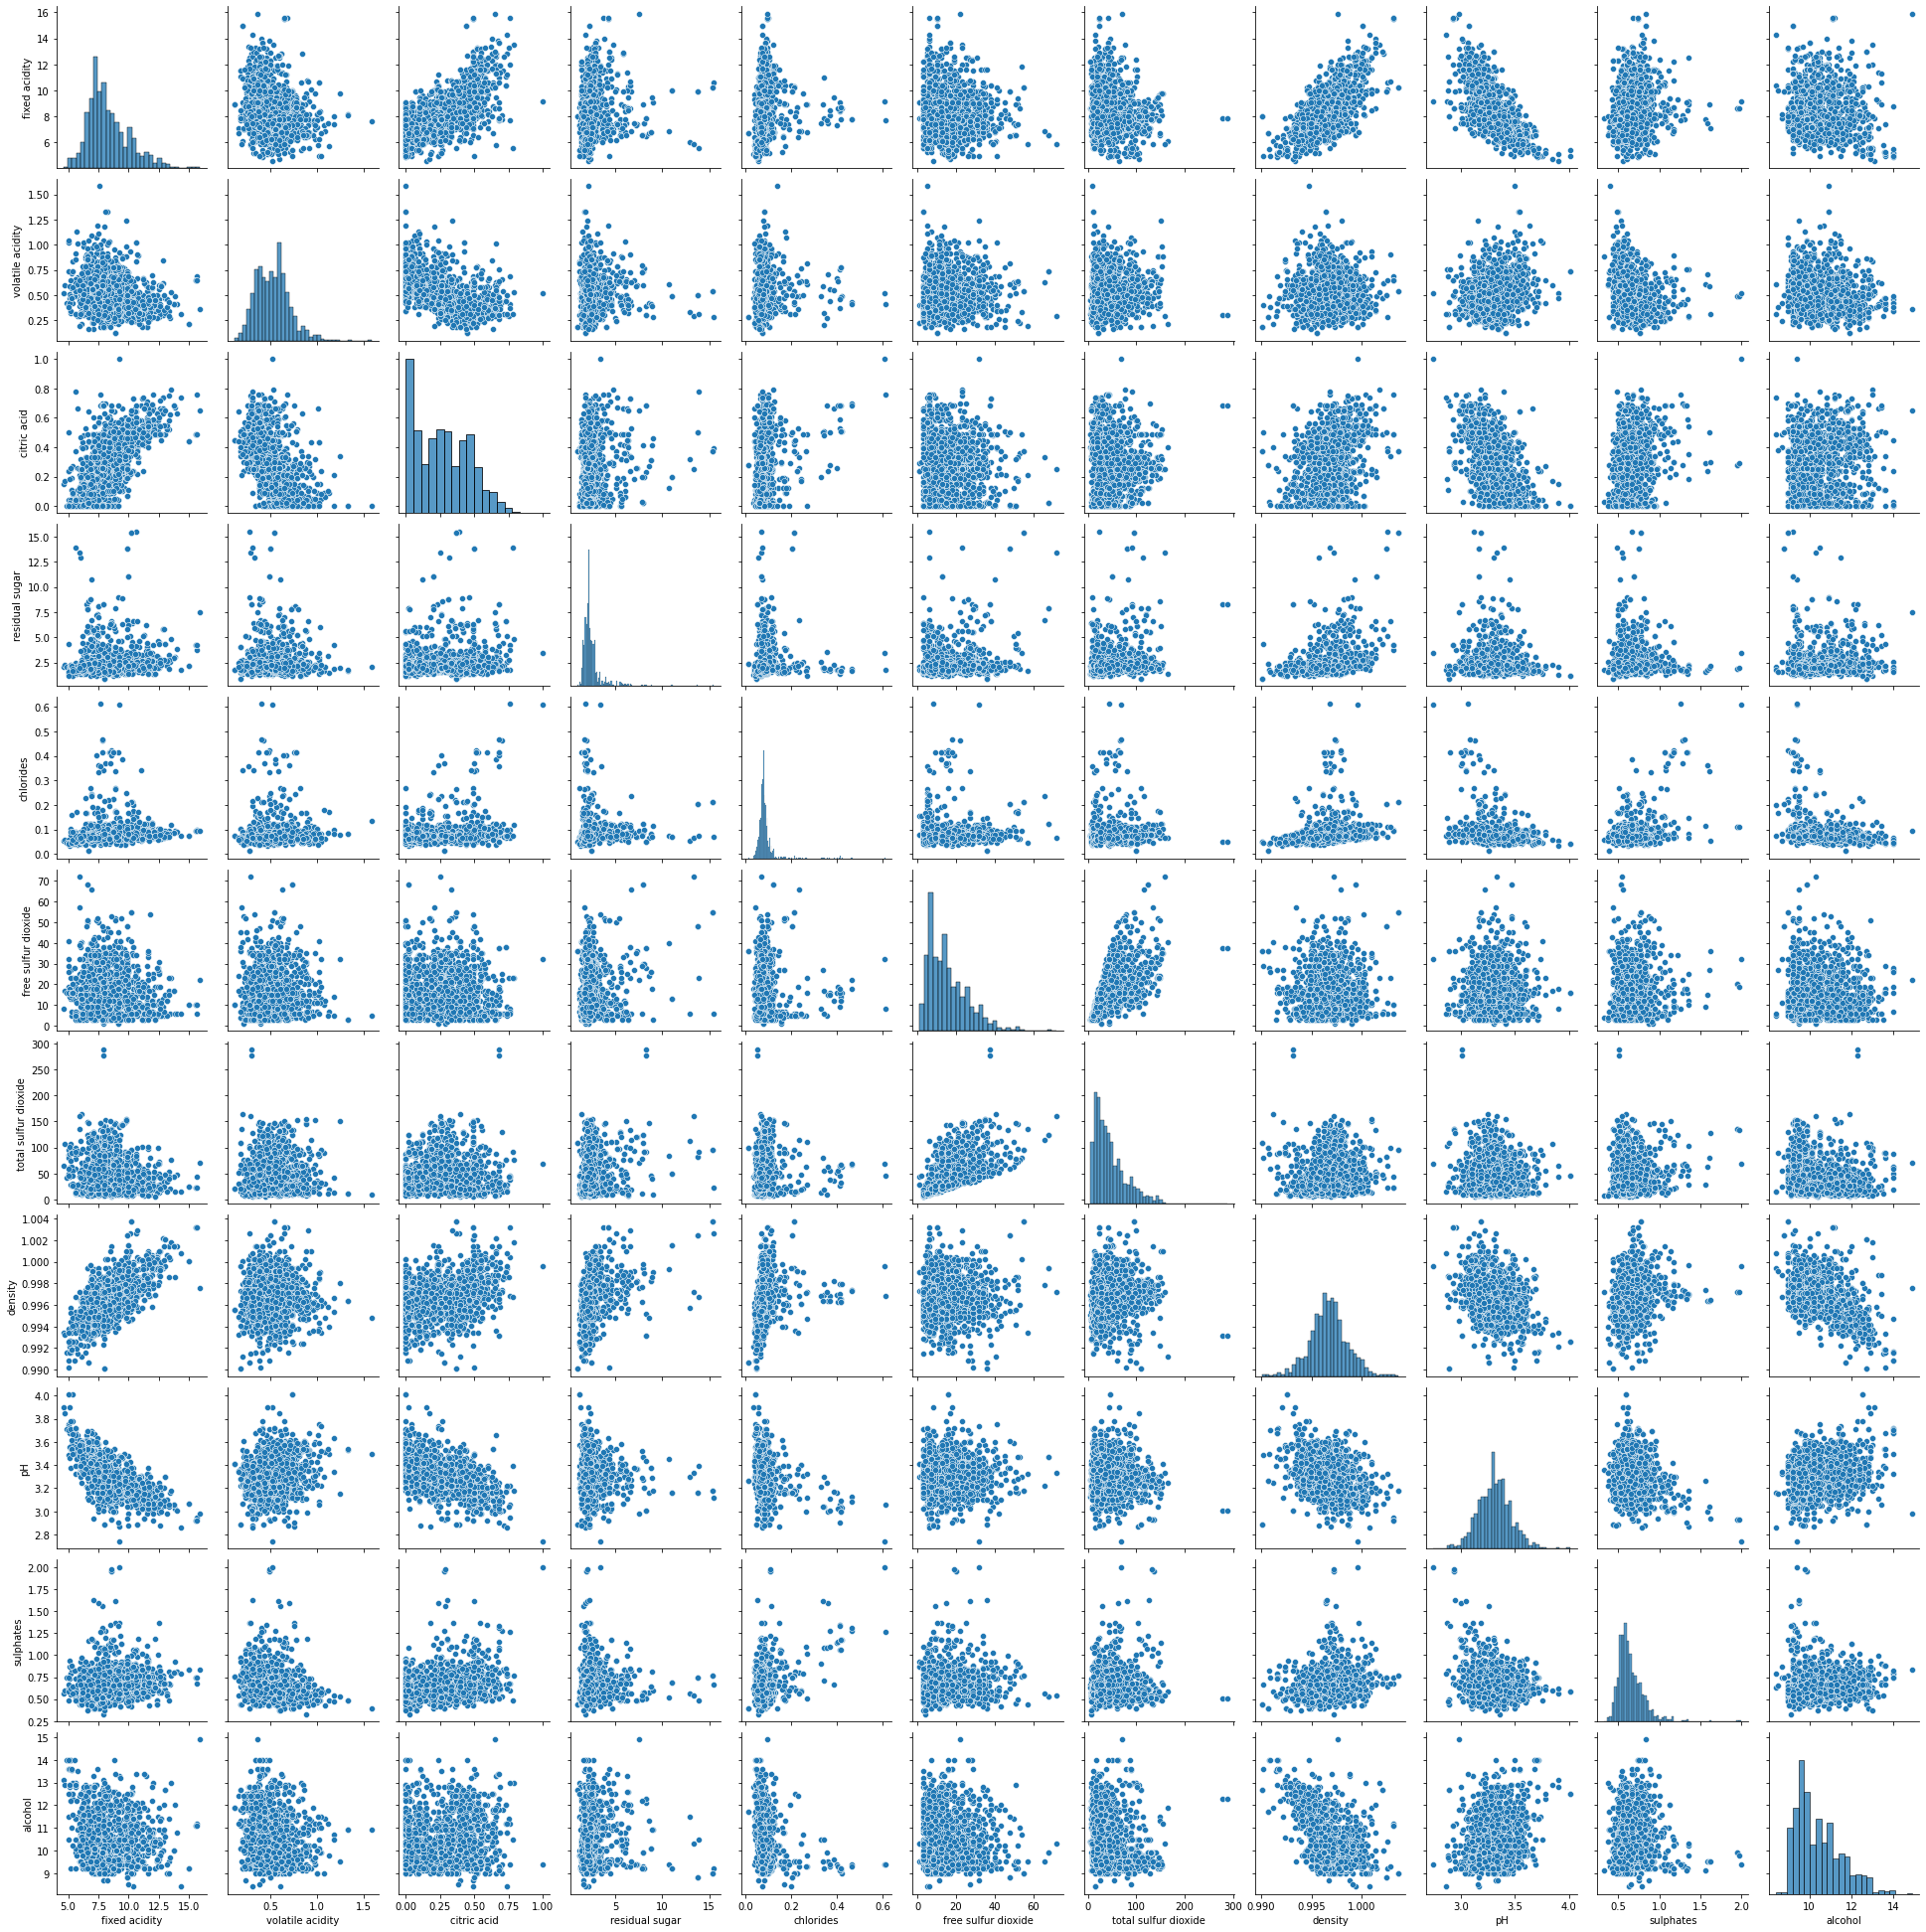

In [265]:
sns.pairplot(wine)
plt.show()

In [266]:
wine['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

## Encoding Categorical Data Using Ordinal Encoder

`OrdinalEncoder()` is called to change the categorical data in `wine[quality]` into numerical data. Since there is order of the quality being good or bad, this is used and makes bad equal to 0.0 and good equal to 1.0, as seen in the `quality` column when using `wine.head()`. No columns need to be dropped since they are all important to the taste, smell, and texture or the wine that impacts its quality.

In [267]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
wine['quality'] = encoder.fit_transform(wine[['quality']])

In [268]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


## Splitting the Dataset into X and Y Variables and Training / Testing the Dataset

The `x` and `y` variables are created using the drop method. `train_test_split` is called from sklearn to split the data 80/20 into 4 different parts: `x_train`, `x_test`, `y_train`, and `y_test`.

In [269]:
x = wine.drop(['quality'], axis = 1)
y = wine['quality']

In [270]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [271]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


## Scaling the Dataset for SVC

`StandardScaler()` is called from `sklearn.preprocessing` to take the x training and test sets and scaling them to fit the rest of the data and make the model more accurate. Since this is a classification problem, only the x sets need to be scaled. This is useful because SVC requires scaling or else the model will not be trained correctly. It also will not impact the other classification techniques, only SVC.

In [272]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Voting Classifier

`LogisticRegrssion`, `RandomForestClassifier`, `DecisionTreeClassifier`, `SVC`, and `VotingClassifier` are all imported so that the classifiers can be used and compared in the voting classifier to find the most accurate model. Each technique has its own variable that holds its respective classifier and the best parameters for the model (others were tested with best being chosen). The voting classifiers takes all these variables as parameters and uses `soft` voting which gives a better accuracy score than `hard` voting. `voting_clf` is then fitted to the x and y training sets in order to find the most accurate classifier for this model.

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 1000)
rnd_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 10)
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 20)
svm_clf = SVC(gamma = 'auto', probability = True) 

In [274]:
voting_clf = VotingClassifier(estimators = [('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf), ('svc', svm_clf)], voting = 'soft')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial')),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=1000)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     random_state=20)),
                             ('svc', SVC(gamma='auto', probability=True))],
                 voting='soft')

## Accuracy Score and Prediction

A for loop is used to take the previous classifier variables and the voting classifier variable as parameters and loop through the data, fitting it once more to x train and y train. It then prints the most accurate score for each classifier and prints the final voting classifier score. The most accurate classifier was the `RandomForestClassifier` with 79-80% and the total voting classifier score is around 78-80%. This model is somewhat accurate, but could be better.

In [275]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

for clf in(log_clf, rnd_clf, dt_clf, svm_clf, voting_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  RMSE = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
  print(clf.__class__.__name__, ":", accuracy_score(y_test, y_pred))
  print("RMSE: ", RMSE, "\n")

LogisticRegression : 0.7416666666666667
RMSE:  0.5082650227325636 

RandomForestClassifier : 0.8
RMSE:  0.4472135954999579 

DecisionTreeClassifier : 0.7541666666666667
RMSE:  0.4958158260214505 

SVC : 0.7583333333333333
RMSE:  0.4915960401250875 

VotingClassifier : 0.8083333333333333
RMSE:  0.43779751788545657 



In [276]:
y_pred_voting = clf.predict(x_test)

## Confusion Matrix and Classification Report

This prints the various scores that help compare the `quality` data from the dataset to the predicted `quality` values. It is clear that the good `quality` scores are more accurate than the bad `quality` scores. This means that the model did a better job at predicting the good wines than the bad wines. 

In [277]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_voting))

[[ 86  22]
 [ 24 108]]


In [278]:
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       108
         1.0       0.83      0.82      0.82       132

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240



## ROC Curve and AUC

This prints the actual `y_test` data compared to the predicted `y_pred_voting` data as a graph that can easily be understood. It is clear that the False Positive Rate vs. the True Positive Rate is decent, being between 0.5 and 1 (closer to 1). This is good because it means that the model was trained correctly and has a decent score, as seen through the `roc_auc_score` being around 80% accuracy.

In [279]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresh = roc_curve(y_test, y_pred_voting)

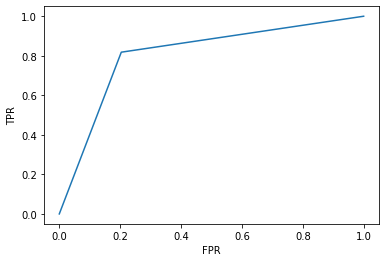

In [280]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [281]:
roc_auc_score(y_test, y_pred_voting)

0.8072390572390573